In [3]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'termcolor'

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import ast
def count_lines_in_g(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)

        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and node.name == "g":
                # The lineno attribute gives the line number of the node's start
                start = node.lineno
                # Using the body's last statement to get the end line of the function
                end = node.body[-1].lineno
                counts.append(end - start + 1)  # Adding 1 to include the last line

    return counts

# Using the function on your list_prg


In [2]:
path= "/home/flowers/work/evaluate_model/P3_test_emb_wizard3B.json"
with open(path, "r") as file:
    data = json.load(file)
len(data)

981

In [3]:
file_path = "/home/flowers/work/evaluate_model/save_results/passk.json"
with open(file_path, 'r') as file:
    data = json.load(file)

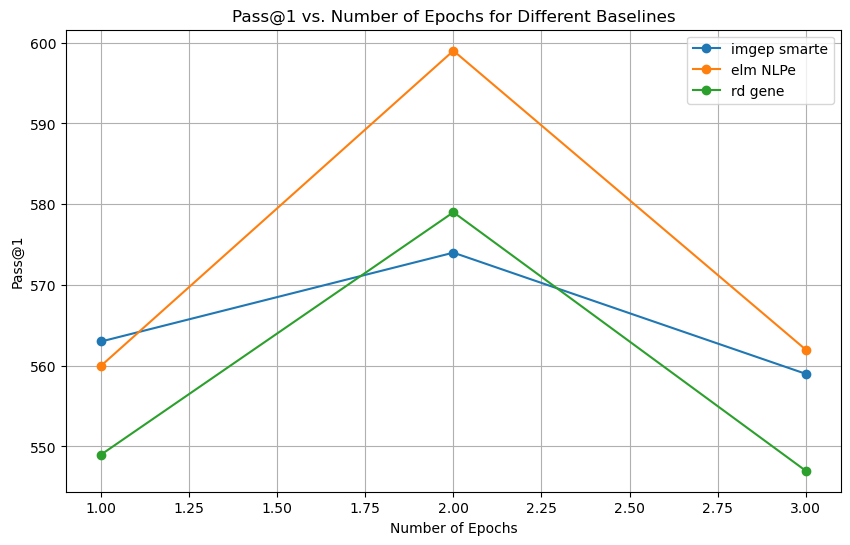

In [4]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from file
file_path = "/home/flowers/work/evaluate_model/save_results/passk.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize a dictionary to hold the data for plotting
# plot_data = {'imgep_smarte': [], 'elm_NLPe': [], 'rd_gene': [], "deepseek-coder-1.3b-instruct": [],"deepseek-coder-1.3b-instruct_traine": []}
plot_data = {'imgep_smarte': [], 'elm_NLPe': [], 'rd_gene': []}#, "deepseek-coder-1.3b-instruct": [],"deepseek-coder-1.3b-instruct_traine": []}

# Correctly extract information from each key and populate plot_data
for key, value in data.items():
    if "deepseek-coder-1.3b-instruct" in key or "deepseek-coder-1.3b-instruct_traine" in key:
        continue
    parts = key.split('_')
    name = '_'.join(parts[:-2])  # Correctly handling names with underscores
     
    n_epochs = int(parts[-2])  # Correctly parsing the number of epochs
    pass_1_value = value['pass_10']
    plot_data[name].append((n_epochs, pass_1_value))

# Sort the data by number of epochs for plotting
for name in plot_data:
    plot_data[name].sort(key=lambda x: x[0])

# Plotting
plt.figure(figsize=(10, 6))

for name, values in plot_data.items():
    epochs = [item[0] for item in values]
    pass_1_values = [item[1] for item in values]
    plt.plot(epochs, pass_1_values, '-o', label=name.replace('_', ' '))

plt.title('Pass@1 vs. Number of Epochs for Different Baselines')
plt.xlabel('Number of Epochs')
plt.ylabel('Pass@1')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
parts[-2]

'3'

In [30]:
# For this task, let's choose a specific epoch to plot pass@k for k=1 to 10.
# I'll choose epoch 2 as an example. If a different epoch is desired, this can be easily adjusted.

# We'll extract pass@k for each baseline at a specific epoch, let's say epoch 2
epoch_of_interest = 1
def plotpass_k(epoch_of_interest):
    # Initialize a dictionary to hold the data for the chosen epoch
    pass_at_k_data = { 'rd_gene': {}, 'elm_NLPe': {},'imgep_smarte': {},"deepseek-coder-1.3b-instruct_base": {},"deepseek-coder-1.3b-instruct_traine": {}}
# plot_data = {'imgep_smarte': [], 'elm_NLPe': [], 'rd_gene': [], "deepseek-coder-1.3b-instruct": [],"deepseek-coder-1.3b-instruct_traine": []}

    # Populate the dictionary with pass@k values for the chosen epoch
    for key, value in data.items():
        if key =="deepseek-coder-1.3b-instruct_base":
            name = "deepseek-coder-1.3b-instruct_base"
            n_epochs = epoch_of_interest
        elif "deepseek-coder-1.3b-instruct_traine" in key:
            name = key
            parts = key.split('_')
            name = '_'.join(parts[:-2])  # Correctly handling names with underscores
            n_epochs = int(parts[-2])  # Correctly parsing the number of epochs
        else:
            parts = key.split('_')
            name = '_'.join(parts[:-2])  # Correctly handling names with underscores
            n_epochs = int(parts[-2])  # Correctly parsing the number of epochs
        if n_epochs == epoch_of_interest:
            # Extract pass@k values for k=1 to 10
            for k in range(1, 11):
                pass_at_k = value[f'pass_{k}']
                # Store the pass@k value in the dictionary under the correct baseline and k
                if k not in pass_at_k_data[name]:
                    pass_at_k_data[name][k] = pass_at_k
                else:
                    # If there's already a value (which shouldn't happen in this context), we can average or replace.
                    # Here, we'll just replace for simplicity.
                    pass_at_k_data[name][k] = pass_at_k

    # Now let's plot pass@k for k=1 to 10 for the chosen epoch across all baselines
    plt.figure(figsize=(10, 6))

    for name, values in pass_at_k_data.items():
        ks = list(values.keys())
        pass_ks = list(values.values())
        plt.plot(ks, pass_ks, '-o', label=name.replace('_', ' '))

    plt.title(f'Pass@k for Epoch {epoch_of_interest}')
    plt.xlabel('k')
    plt.ylabel('Pass@k')
    plt.xticks(range(1, 11))  # Ensure x-axis ticks are for k=1 to 10
    plt.legend()
    plt.grid(True)
    plt.show()


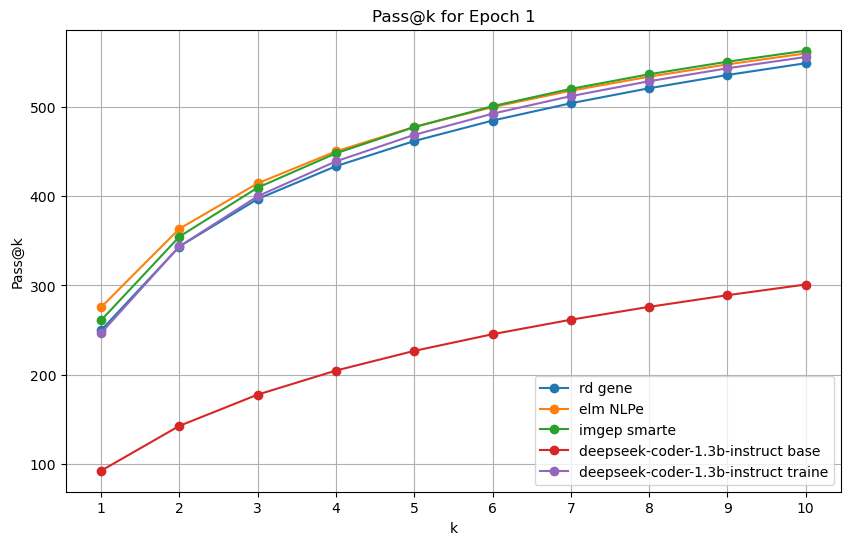

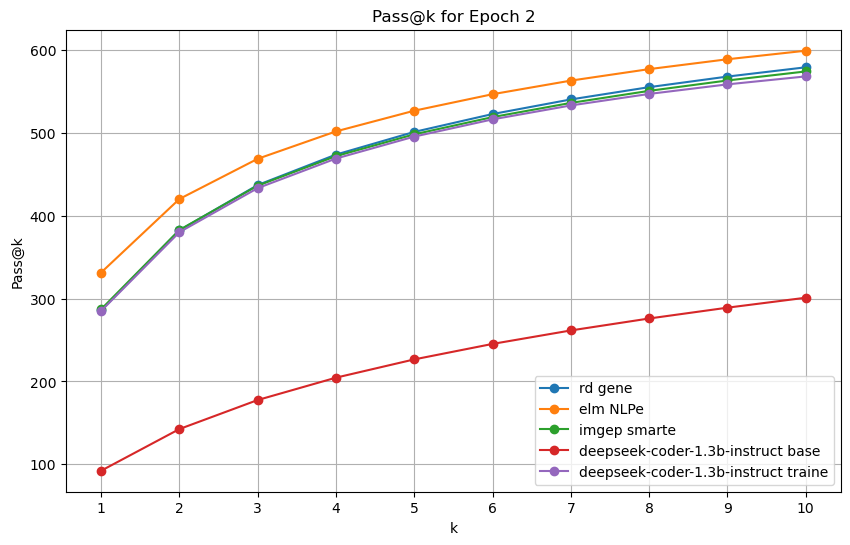

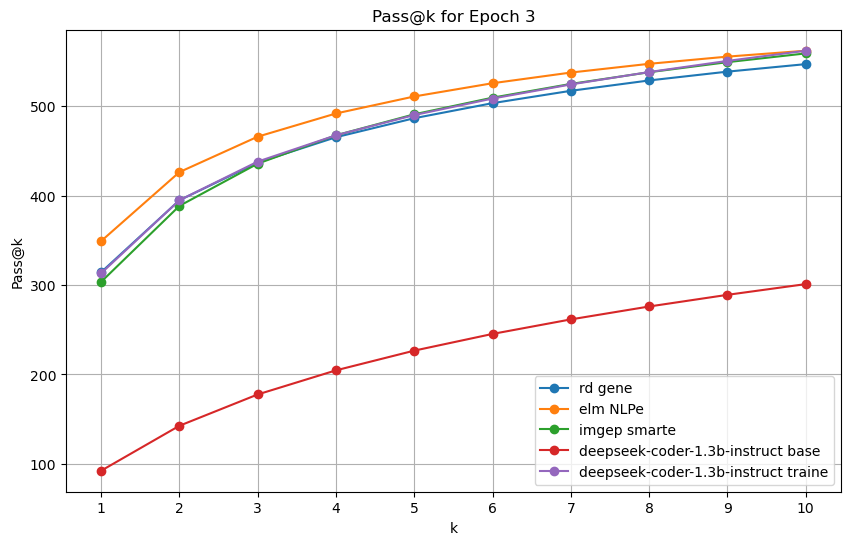

In [31]:
plotpass_k(1)
plotpass_k(2)
plotpass_k(3)

In [6]:
from evalplus.data import get_human_eval_plus, write_jsonl

samples = [
    dict(task_id=task_id, completion=problem["prompt"])
    for task_id, problem in get_human_eval_plus().items()
]
samples = samples*10
write_jsonl("samples.jsonl",samples )

In [4]:
# from evalplus.data import get_mbpp_plus, write_jsonl

# samples = [
#     dict(task_id=task_id, completion=problem["prompt"])
#     for task_id, problem in get_mbpp_plus().items()
# ]
# write_jsonl("samples.jsonl", samples)
# len(samples)

In [1]:
import argparse
from evalplus.evaluate import evaluate

def parse_args(args=None):
    parser = argparse.ArgumentParser()
    parser.add_argument("--dataset", required=True, type=str, choices=["humaneval", "mbpp"], default="humaneval")
    parser.add_argument("--samples", required=True, type=str, default="samples.jsonl")
    parser.add_argument("--base-only", action="store_true")
    parser.add_argument("--parallel", default=None, type=int)
    parser.add_argument("--i-just-wanna-run", action="store_true")
    parser.add_argument("--test-details", action="store_true")
    parser.add_argument("--min-time-limit", default=1, type=float)
    parser.add_argument("--gt-time-limit-factor", default=4.0, type=float)
    parser.add_argument("--mini", action="store_true")
    parser.add_argument("--noextreme", action="store_true", help="Omit extreme test inputs")
    
    return parser.parse_args(args)
args = parse_args([
    '--dataset', 'humaneval',
    '--samples', 'samples.jsonl',
    '--parallel', '32',
    '--i-just-wanna-run',
])

print(args)
# evaluate(args)

Namespace(dataset='humaneval', samples='samples.jsonl', base_only=False, parallel=32, i_just_wanna_run=True, test_details=False, min_time_limit=1, gt_time_limit_factor=4.0, mini=False, noextreme=False)


In [11]:
from appdirs import user_cache_dir
CACHE_DIR = user_cache_dir("evalplus")


In [12]:
CACHE_DIR

'/home/flowers/.cache/evalplus'

In [2]:

from utils_eval_plus import evaluate_plus
evaluate_plus(args)

TypeError: get_human_eval_plus() got an unexpected keyword argument 'noextreme'

In [7]:
from evalplus.eval import FAIL

ImportError: cannot import name 'FAIL' from 'evalplus.eval' (/home/flowers/miniconda3/envs/inference/lib/python3.10/site-packages/evalplus/eval/__init__.py)

In [4]:
!pwd

/home/flowers/work/evaluate_model


In [ ]:
evaluate.py --dataset humaneval --samples samples.jsonl

In [7]:
from evalplus.data import get_human_eval_plus, write_jsonl

# len(get_human_eval_plus())
dic_puzzles = get_human_eval_plus()

In [9]:
dic_puzzles['HumanEval/1']["prompt"]

'from typing import List\n\n\ndef separate_paren_groups(paren_string: str) -> List[str]:\n    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to\n    separate those group into separate strings and return the list of those.\n    Separate groups are balanced (each open brace is properly closed) and not nested within each other\n    Ignore any spaces in the input string.\n    >>> separate_paren_groups(\'( ) (( )) (( )( ))\')\n    [\'()\', \'(())\', \'(()())\']\n    """\n'

In [3]:
list(dic_puzzles.keys())
list_problem = [dic_puzzles[key]["prompt"] for key in list(dic_puzzles.keys())]

In [6]:
list_problem[0]

'from typing import List\n\n\ndef has_close_elements(numbers: List[float], threshold: float) -> bool:\n    """ Check if in given list of numbers, are any two numbers closer to each other than\n    given threshold.\n    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)\n    False\n    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)\n    True\n    """\n'

In [2]:
from evalplus.data import get_mbpp_plus, write_jsonl
list=get_mbpp_plus()

In [5]:
list["Mbpp/2"]["prompt"]

'"""\nWrite a function to find the shared elements from the given two lists.\nassert set(similar_elements((3, 4, 5, 6),(5, 7, 4, 10))) == set((4, 5))\n"""\n'

In [10]:
print(samples[0]["solution"])

"""
Write a function to find the shared elements from the given two lists.
assert set(similar_elements((3, 4, 5, 6),(5, 7, 4, 10))) == set((4, 5))
"""



In [22]:
lis=['deepseek-coder-1.3b-instruct', 'traine', '3', '1']
lis[-2]

'3'

In [20]:
import pickle
path_13b="/home/flowers/work/evaluate_model/save_feat/WizardCoder-Python-13B-V1.0full_trainset_feat.pkl"
path_7b="/home/flowers/work/evaluate_model/save_feat/WizardCoder-Python-7B-V1.0full_trainset_feat.pkl"
path_15b="/home/flowers/work/evaluate_model/save_feat/WizardCoder-15B-V1.0full_trainset_feat.pkl"
with open(path_15b, 'rb') as f:
    data_13b = pickle.load(f)
# 7b=>4096
#13b => 5120
# 15b => 6144


FileNotFoundError: [Errno 2] No such file or directory: '/home/flowers/work/evaluate_model/save_feat/WizardCoder-15B-V1.0full_trainset_feat.pkl'

In [15]:
data_13b[0][1].shape

(9512, 1, 6144)

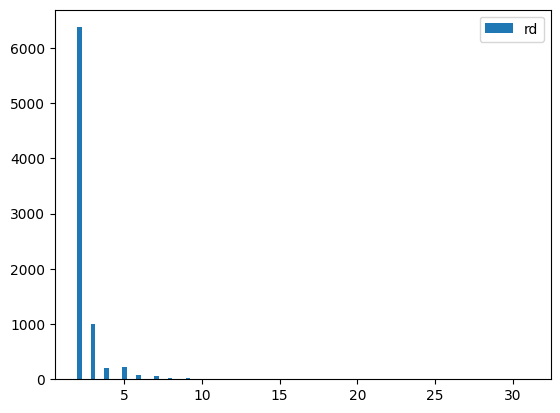

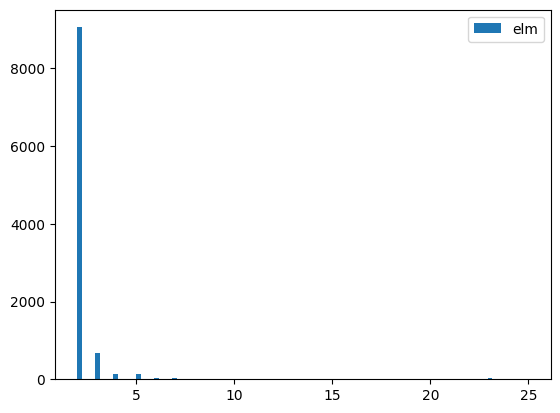

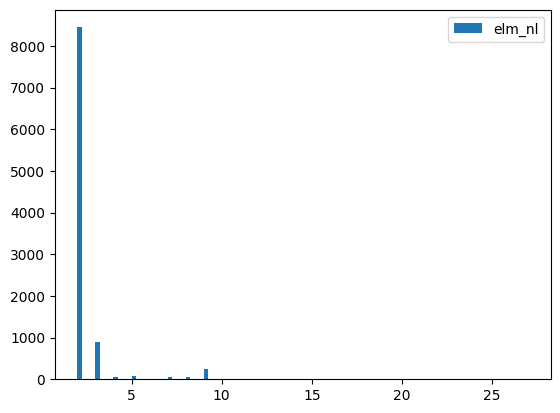

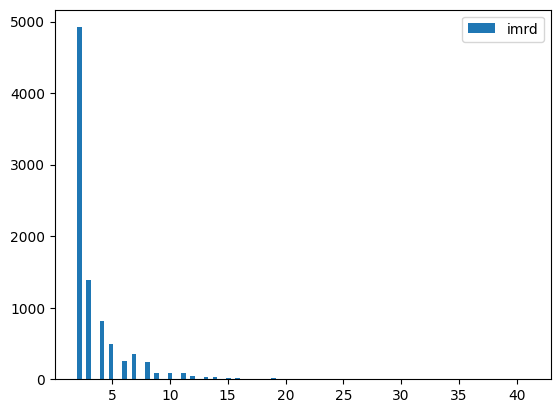

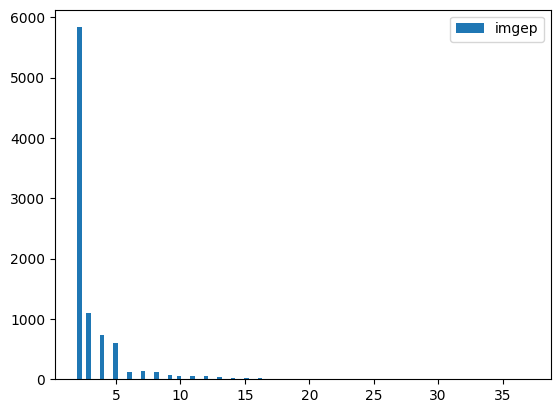

In [8]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]
    out=count_lines_in_g(list_prg)
    list_res.append(out)
    plt.hist(out, bins=100,label=name[i])
    plt.legend()
    plt.show()

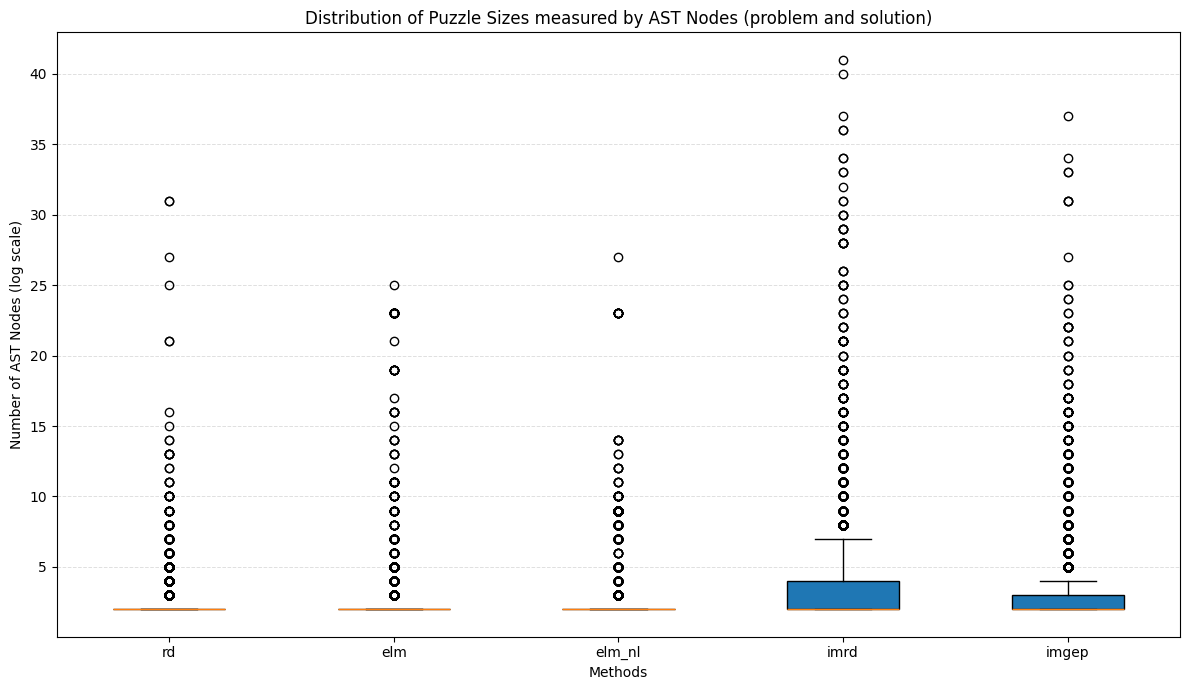

In [3]:
plt.figure(figsize=(12, 7))
# plt.yscale("log")  # Set y-axis to log scale
plt.boxplot(list_res, vert=True, patch_artist=True, labels=name)  # Plotting the box plot

# Setting labels and title
plt.xlabel("Methods")
plt.ylabel("Number of AST Nodes (log scale)")
plt.title("Distribution of Puzzle Sizes measured by AST Nodes (problem and solution)")

# Display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()

In [29]:
import ast

def count_nodes_in_g(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)
        num=0
        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and (node.name == "g"):
                # Counting all the nodes within this function's subtree
                node_count = sum(1 for _ in ast.walk(node))
                num+=node_count
        counts.append(num)

    return counts

def count_nodes_in_f(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)
        num=0
        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and (node.name == "f"):
                # Counting all the nodes within this function's subtree
                node_count = sum(1 for _ in ast.walk(node))
                num+=node_count
        counts.append(num)

    return counts

def count_nodes_in(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)
        num=0
        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and (node.name == "g" or node.name == "f"):
                # Counting all the nodes within this function's subtree
                node_count = sum(1 for _ in ast.walk(node))
                num+=node_count
        counts.append(num)

    return counts

# Using the function on your list_prg
# print(count_nodes_in_g(list_prg))


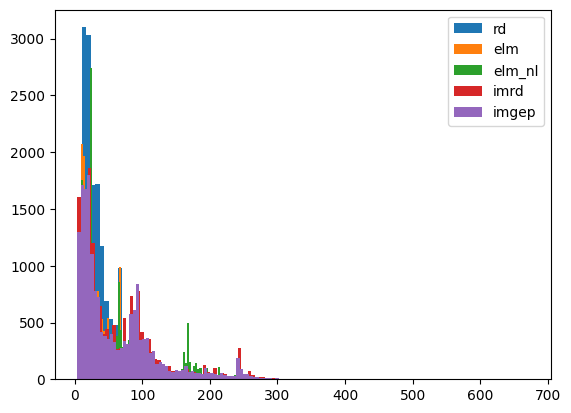

In [13]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]
    out=count_nodes_in(list_prg)
    list_res.append(out)
    plt.hist(out, bins=100,label=name[i])
plt.legend()
plt.show()

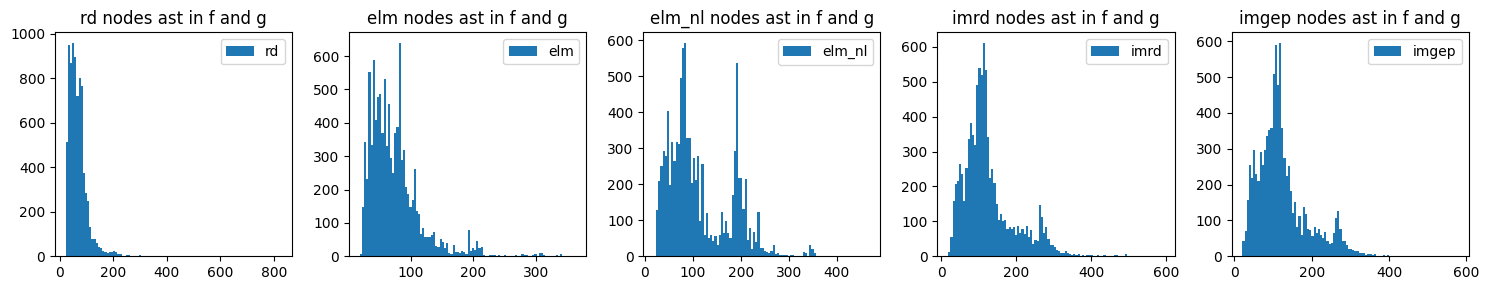

In [24]:
import json
import matplotlib.pyplot as plt

# Paths
path_rd = "/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd, path_elm, path_elm_nl, path_imrd, path_imgep]
name = ["rd", "elm", "elm_nl", "imrd", "imgep"]
list_res = []

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 5 plots on the same row

for i, path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg = [puz["program_str"] for puz in data]
    out = count_nodes_in(list_prg)
    list_res.append(out)
    
    # Plot on the specific subplot
    axes[i].hist(out, bins=100, label=name[i])
    axes[i].legend()
    axes[i].set_title(name[i]+ " nodes ast in f and g")

plt.tight_layout()
plt.show()


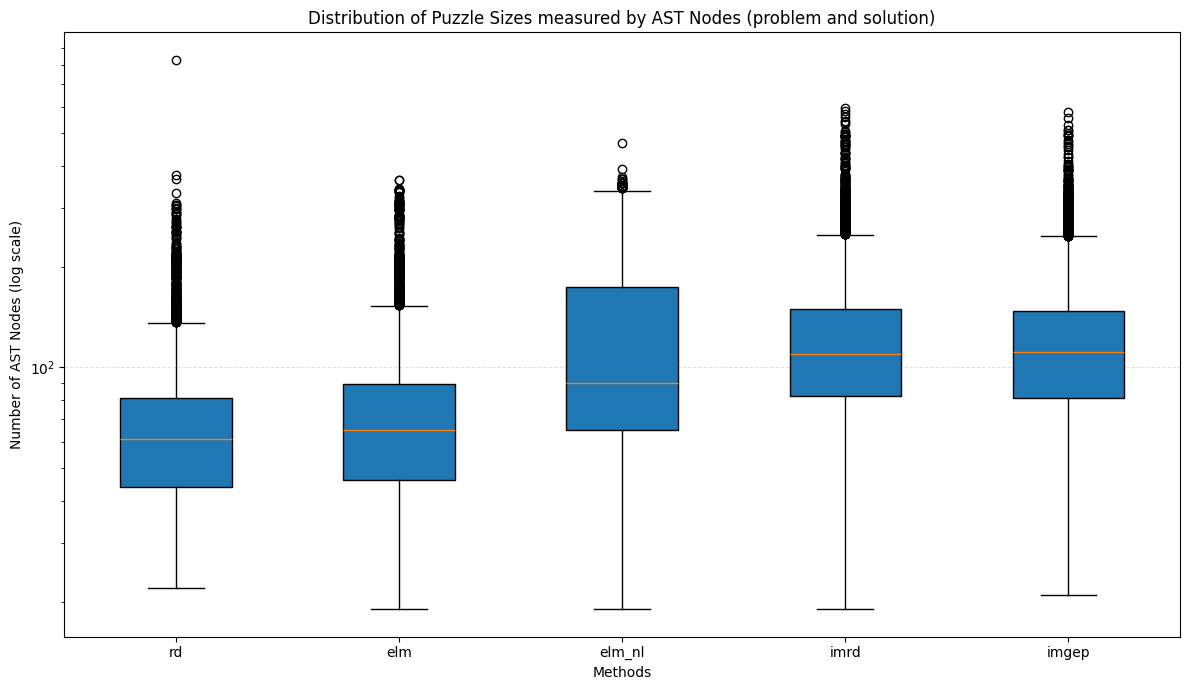

In [26]:
plt.figure(figsize=(12, 7))
plt.yscale("log")  # Set y-axis to log scale
plt.boxplot(list_res, vert=True, patch_artist=True, labels=name)  # Plotting the box plot

# Setting labels and title
plt.xlabel("Methods")
plt.ylabel("Number of AST Nodes (log scale)")
plt.title("Distribution of Puzzle Sizes measured by AST Nodes (problem and solution)")

# Display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()

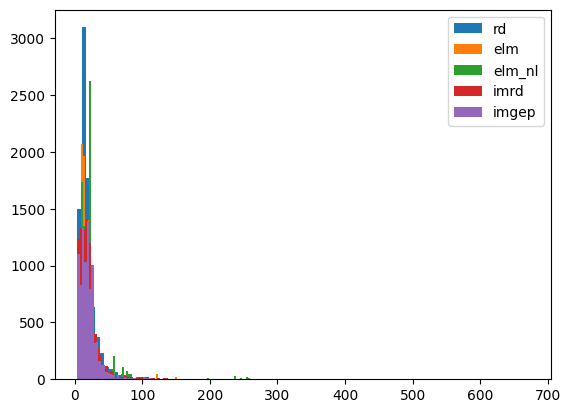

In [15]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]
    out=count_nodes_in_g(list_prg)
    list_res.append(out)
    plt.hist(out, bins=100,label=name[i])
plt.legend()
plt.show()

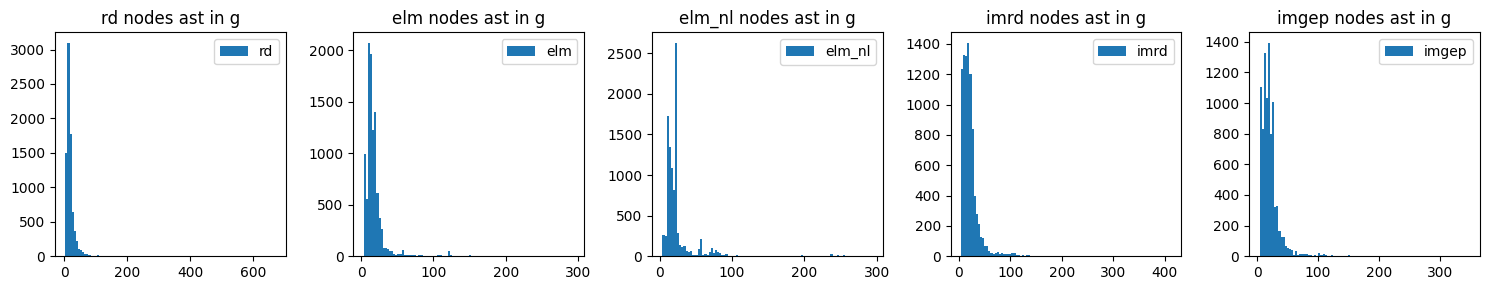

In [27]:
import json
import matplotlib.pyplot as plt

# Paths
path_rd = "/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd, path_elm, path_elm_nl, path_imrd, path_imgep]
name = ["rd", "elm", "elm_nl", "imrd", "imgep"]
list_res = []

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 5 plots on the same row

for i, path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg = [puz["program_str"] for puz in data]
    out = count_nodes_in_g(list_prg)
    list_res.append(out)
    
    # Plot on the specific subplot
    axes[i].hist(out, bins=100, label=name[i])
    axes[i].legend()
    axes[i].set_title(name[i]+ " nodes ast in g")

plt.tight_layout()
plt.show()


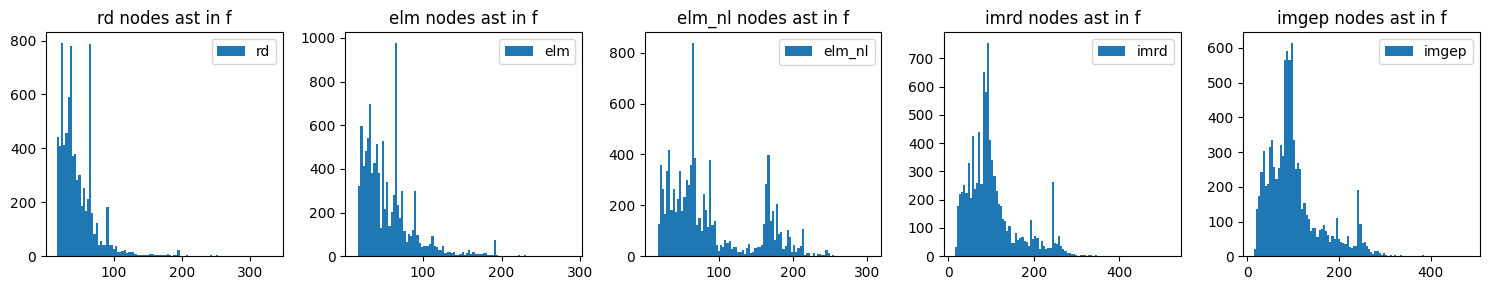

In [31]:
import json
import matplotlib.pyplot as plt

# Paths
path_rd = "/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd, path_elm, path_elm_nl, path_imrd, path_imgep]
name = ["rd", "elm", "elm_nl", "imrd", "imgep"]
list_res = []

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 5 plots on the same row

for i, path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg = [puz["program_str"] for puz in data]
    out = count_nodes_in_f(list_prg)
    list_res.append(out)
    
    # Plot on the specific subplot
    axes[i].hist(out, bins=100, label=name[i])
    axes[i].legend()
    axes[i].set_title(name[i]+ " nodes ast in f")

plt.tight_layout()
plt.show()


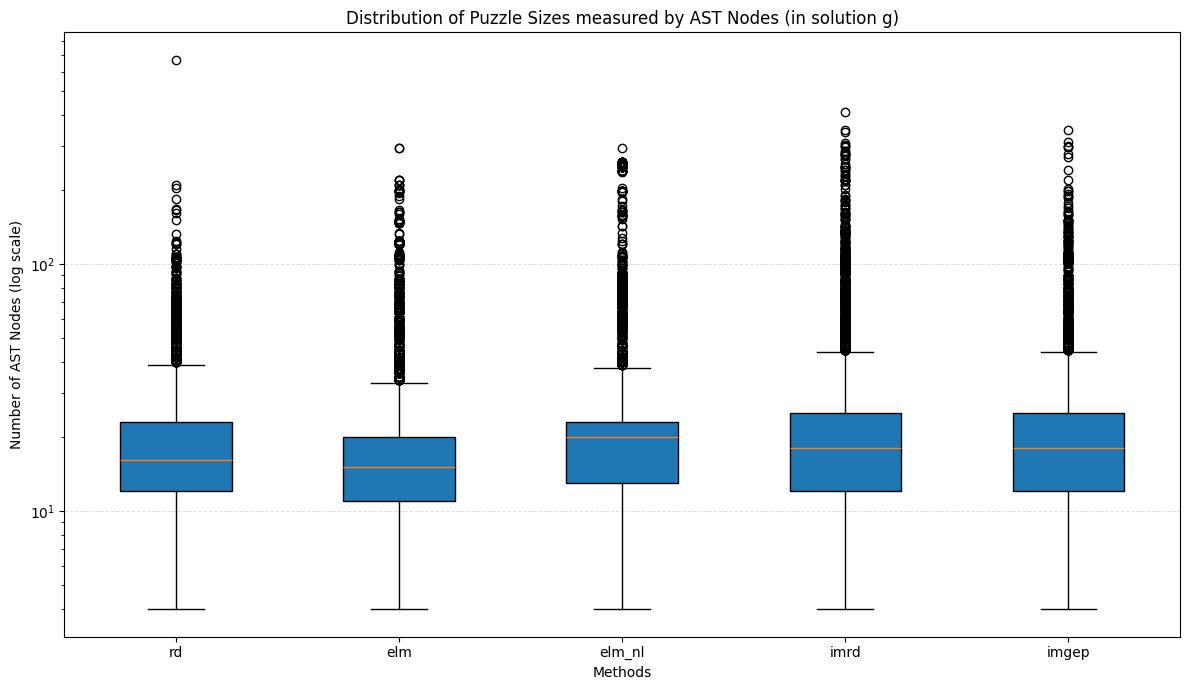

In [12]:
plt.figure(figsize=(12, 7))
plt.yscale("log")  # Set y-axis to log scale
plt.boxplot(list_res, vert=True, patch_artist=True, labels=name)  # Plotting the box plot

# Setting labels and title
plt.xlabel("Methods")
plt.ylabel("Number of AST Nodes (log scale)")
plt.title("Distribution of Puzzle Sizes measured by AST Nodes (in solution g)")

# Display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()
